In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as smf

pd.set_option('display.max_columns', 500)


%matplotlib inline

In [116]:
#removed the stops that are outside of San Francisco, Need to add this step to the linking buffer data step
estimate = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2009/Tenth_Data_rs_day.csv',thousands = ',')
estimate = estimate.drop(estimate[estimate['STOP_ID'].isin([4341,5585,5588,5594,7099,7554,7606,7842,4808,4809,4895,6283,6384,6385,6388,6389,7522,7127])].index,axis = 0)

In [117]:
estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)

In [118]:
print(max(estimate.RUNSPEED))
print(min(estimate.RUNSPEED))

909.32
0.0


In [119]:
print(max(estimate.TOTSPEED))
print(min(estimate.TOTSPEED))

909.32
0.0


In [120]:
estimate.RUNSPEED = estimate.RUNSPEED.clip(upper = 40)
estimate.RUNSPEED = estimate.TOTSPEED.clip(upper = 40)


In [121]:
#leave out travel time to work for now
#estimate['Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)'] = estimate['Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)'].astype(float)

In [122]:
estimate.info(max_cols = 99999)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17995 entries, 0 to 18092
Data columns (total 122 columns):
Unnamed: 0                                                17995 non-null int64
MONTH                                                     17995 non-null object
DOW                                                       17995 non-null int64
AGENCY_ID                                                 17995 non-null object
ROUTE_SHORT_NAME                                          17995 non-null object
DIR                                                       17995 non-null int64
SEQ                                                       17995 non-null int64
NUMDAYS                                                   17995 non-null int64
OBSDAYS                                                   17995 non-null float64
TRIP_STOPS                                                17995 non-null int64
OBS_TRIP_STOPS                                            17995 non-null int64
IMP_TRIP_STOPS  

In [123]:
estimate.head()

Unnamed: 0       MONTH  DOW AGENCY_ID ROUTE_SHORT_NAME  DIR  SEQ  NUMDAYS  \
0           0  2009-10-01    1     SFMTA            016AX    0    3       22   
1           1  2009-10-01    1     SFMTA            016AX    0    4       22   
2           2  2009-10-01    1     SFMTA            016AX    0    5       22   
3           3  2009-10-01    1     SFMTA            016AX    0    6       22   
4           4  2009-10-01    1     SFMTA            016AX    0    7       22   

   OBSDAYS  TRIP_STOPS  OBS_TRIP_STOPS  IMP_TRIP_STOPS  WGT_TRIP_STOPS  \
0     18.0          13               2             0.0            13.0   
1      0.0          13               0             0.0            13.0   
2     18.0          13               2             0.0            13.0   
3     18.0          13               2             0.0            13.0   
4     18.0          13               2             0.0            13.0   

   STOP_ID ROUTE_LONG_NAME  ROUTE_TYPE TRIP_HEADSIGN  HEADWAY_S  FARE  \
0     3612   NORIEGA A EXP           3   48TH AVENUE  10.666667   2.0   
1     7305   NORIEGA A EXP           3   48TH AVENUE  10.666667   2.0   
2     6733   NORIEGA A EXP           3   48TH AVENUE  10.666667   2.0   
3     6719   NORIEGA A EXP           3   48TH AVENUE  10.666667   2.0   
4     6721   NORIEGA A EXP           3   48TH AVENUE  10.666667   2.0   

                      STOPNAME               STOPNAME_AVL  STOP_LAT_x  \
0  CYRIL MAGNIN ST & MARKET ST  5TH ST NORTH&MARKET ST NW   37.784011   
1    EDDY ST & CYRIL MAGNIN ST                        NaN   37.784386   
2          TURK ST & TAYLOR ST  TURK ST&TAYLOR ST N-MB/BZ   37.783387   
3           TURK ST & JONES ST  TURK ST&JONES ST NW-FS/BZ   37.783039   
4     TURK ST & LEAVENWORTH ST  TURK ST&LEAVENWORTH ST NW   37.782835   

   STOP_LON_x  EOL  SOL  TIMEPOINT  ARRIVAL_TIME_DEV  DEPARTURE_TIME_DEV  \
0 -122.408210    0    1        1.0         -3.875743           -0.070542   
1 -122.408599    0    0        NaN               NaN                 NaN   
2 -122.409895    0    0        0.0          0.270194            0.350709   
3 -122.412577    0    0        0.0          0.134795            0.177869   
4 -122.414217    0    0        0.0          0.291456            0.363253   

   DWELL_S      DWELL  RUNTIME_S    RUNTIME  TOTTIME_S    TOTTIME  \
0      0.0  49.476280       0.00   0.000000       0.00  49.476280   
1      0.0        NaN       2.99        NaN       2.99        NaN   
2      0.0   1.049097      11.05  18.514923      11.05  19.564020   
3      0.0   0.563574      12.74   9.969848      12.74  10.533422   
4      0.0   0.933352       7.80   9.271992       7.80  10.205344   

   SERVMILES_S  SERVMILES  RUNSPEED_S  RUNSPEED  TOTSPEED_S  TOTSPEED  \
0        0.000      0.000        0.00      0.00        0.00      0.00   
1        0.429      0.429        8.61       NaN        8.61       NaN   
2        1.287      1.287        6.99      3.95        6.99      3.95   
3        1.937      1.937        9.12     11.03        9.12     11.03   
4        1.183      1.183        9.10      6.96        9.10      6.96   

    ONTIME5          ON       OFF    LOAD_ARR    LOAD_DEP  PASSMILES  \
0  0.737434  258.292460  0.240741    0.240741  258.292460   0.000000   
1       NaN         NaN       NaN         NaN         NaN        NaN   
2  0.728175    7.129365  0.240741  258.292460  265.181085  25.570954   
3  0.676323    4.171693  1.083333  265.181085  268.269444  39.511982   
4  0.645238    2.864815  3.033333  268.269444  268.100926  24.412519   

   PASSHOURS  WAITHOURS  FULLFARE_REV  PASSDELAY_DEP  PASSDELAY_ARR  RDBRDNGS  \
0  20.102898  23.016448    516.584921     287.502463      91.157255       0.0   
1        NaN        NaN           NaN            NaN            NaN       NaN   
2   6.700418   0.531593     14.258730       5.972606       5.569709       0.0   
3   3.611110   0.348186      8.343386       7.237389       6.390463       0.0   
4   3.485574   0.345664      5.729630       5.4101

In [124]:
estimate[['HEADWAY_S', 'FREQ_S']].head()

HEADWAY_S  FREQ_S
0  10.666667   5.625
1  10.666667   5.625
2  10.666667   5.625
3  10.666667   5.625
4  10.666667   5.625

In [125]:
for column in estimate.columns:
        print(column)

Unnamed: 0
MONTH
DOW
AGENCY_ID
ROUTE_SHORT_NAME
DIR
SEQ
NUMDAYS
OBSDAYS
TRIP_STOPS
OBS_TRIP_STOPS
IMP_TRIP_STOPS
WGT_TRIP_STOPS
STOP_ID
ROUTE_LONG_NAME
ROUTE_TYPE
TRIP_HEADSIGN
HEADWAY_S
FARE
STOPNAME
STOPNAME_AVL
STOP_LAT_x
STOP_LON_x
EOL
SOL
TIMEPOINT
ARRIVAL_TIME_DEV
DEPARTURE_TIME_DEV
DWELL_S
DWELL
RUNTIME_S
RUNTIME
TOTTIME_S
TOTTIME
SERVMILES_S
SERVMILES
RUNSPEED_S
RUNSPEED
TOTSPEED_S
TOTSPEED
ONTIME5
ON
OFF
LOAD_ARR
LOAD_DEP
PASSMILES
PASSHOURS
WAITHOURS
FULLFARE_REV
PASSDELAY_DEP
PASSDELAY_ARR
RDBRDNGS
DOORCYCLES
WHEELCHAIR
BIKERACK
CAPACITY
VC
CROWDED
CROWDHOURS
STOP_LAT_y
STOP_LON_y
geometry
index_right
ALAND00
AWATER00
COUNTYFP00
CTIDFP00
NAME00
TRACTCE00
Id
Id2
Geography
Total_Pop
Total_Housing_Units
Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)
VAC_RATE
OCC_RATE
PER_INCOME_0-15
PER_INCOME_15-50
PER_INCOME_50-100
PER_INCOME_100+
AVG_HH_SIZE
PER_HH_0VEH
POP_DEN_ACS
HH_DEN_ACS
HU_DEN_ACS
geometry_a
Average Hourly Price
parking_rate
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR


In [126]:
drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'ALAND00',
'AWATER00',
'COUNTYFP00',
'CTIDFP00',
'NAME00',
'TRACTCE00',
'Id',
'Id2',
'Geography',
'geometry_a',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']

In [127]:
estimate = estimate.drop(drop,axis = 1)

In [128]:
for column in estimate.columns:
    print(column)

MONTH
DOW
AGENCY_ID
ROUTE_SHORT_NAME
DIR
SEQ
NUMDAYS
OBSDAYS
TRIP_STOPS
OBS_TRIP_STOPS
IMP_TRIP_STOPS
WGT_TRIP_STOPS
STOP_ID
ROUTE_LONG_NAME
ROUTE_TYPE
TRIP_HEADSIGN
HEADWAY_S
FARE
STOPNAME
STOPNAME_AVL
EOL
SOL
TIMEPOINT
ARRIVAL_TIME_DEV
DEPARTURE_TIME_DEV
DWELL_S
DWELL
RUNTIME_S
RUNTIME
TOTTIME_S
TOTTIME
SERVMILES_S
SERVMILES
RUNSPEED_S
RUNSPEED
TOTSPEED_S
TOTSPEED
ONTIME5
ON
OFF
LOAD_ARR
LOAD_DEP
PASSMILES
PASSHOURS
WAITHOURS
FULLFARE_REV
PASSDELAY_DEP
PASSDELAY_ARR
RDBRDNGS
DOORCYCLES
WHEELCHAIR
BIKERACK
CAPACITY
VC
CROWDED
CROWDHOURS
Total_Pop
Total_Housing_Units
Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)
VAC_RATE
OCC_RATE
PER_INCOME_0-15
PER_INCOME_15-50
PER_INCOME_50-100
PER_INCOME_100+
AVG_HH_SIZE
PER_HH_0VEH
POP_DEN_ACS
HH_DEN_ACS
HU_DEN_ACS
Average Hourly Price
parking_rate
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICE12HR
PRICEDAY
PRICEDAYDISCOUNT
BART_FROMS
BART_TOS
CALTRAIN_OFF
CALTRAIN_ON
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED


In [129]:
change = ['EMP_RAC_SCALED','EMP_WAC_SCALED','LEISER_RAC_SCALED','LEISER_WAC_SCALED','OTHER_RAC_SCALED','OTHER_WAC_SCALED','RETAIL_RAC_SCALED','RETAIL_WAC_SCALED','BART_FROMS','BART_TOS','MUNI_RAIL_ALIGHTINGS','MUNI_RAIL_BOARDINGS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

In [130]:
for column in change:
    estimate[column] = estimate[column].fillna(0)

In [131]:
estimate = estimate.drop(estimate[np.isnan(estimate['ON'])].index,axis = 0)

In [132]:
estimate[np.isnan(estimate['ON'])]

Empty DataFrame
Columns: [MONTH, DOW, AGENCY_ID, ROUTE_SHORT_NAME, DIR, SEQ, NUMDAYS, OBSDAYS, TRIP_STOPS, OBS_TRIP_STOPS, IMP_TRIP_STOPS, WGT_TRIP_STOPS, STOP_ID, ROUTE_LONG_NAME, ROUTE_TYPE, TRIP_HEADSIGN, HEADWAY_S, FARE, STOPNAME, STOPNAME_AVL, EOL, SOL, TIMEPOINT, ARRIVAL_TIME_DEV, DEPARTURE_TIME_DEV, DWELL_S, DWELL, RUNTIME_S, RUNTIME, TOTTIME_S, TOTTIME, SERVMILES_S, SERVMILES, RUNSPEED_S, RUNSPEED, TOTSPEED_S, TOTSPEED, ONTIME5, ON, OFF, LOAD_ARR, LOAD_DEP, PASSMILES, PASSHOURS, WAITHOURS, FULLFARE_REV, PASSDELAY_DEP, PASSDELAY_ARR, RDBRDNGS, DOORCYCLES, WHEELCHAIR, BIKERACK, CAPACITY, VC, CROWDED, CROWDHOURS, Total_Pop, Total_Housing_Units, Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes), VAC_RATE, OCC_RATE, PER_INCOME_0-15, PER_INCOME_15-50, PER_INCOME_50-100, PER_INCOME_100+, AVG_HH_SIZE, PER_HH_0VEH, POP_DEN_ACS, HH_DEN_ACS, HU_DEN_ACS, Average Hourly Price, parking_rate, PRICE1HR, PRICE2HR, PRICE3HR, PRICE4HR, PRICE12HR, PRICEDAY, PRICEDAYDISCOUNT, BART_FROMS, BART_TOS, CALTRAIN_OFF, CALTRAIN_ON, MUNI_RAIL_ALIGHTINGS, MUNI_RAIL_BOARDINGS, EDHLTH_RAC_SCALED, EDHLTH_WAC_SCALED, EMP_RAC_SCALED, EMP_WAC_SCALED, LEISER_RAC_SCALED, LEISER_WAC_SCALED, OTHER_RAC_SCALED, OTHER_WAC_SCALED, RETAIL_RAC_SCALED, RETAIL_WAC_SCALED, HOUSING_09_SCALED, NUM_BUS_STOPS, Count_, EDD_EMP, FREQ_S]
Index: []

In [133]:
estimate[np.isnan(estimate['BART_FROMS'])]

Empty DataFrame
Columns: [MONTH, DOW, AGENCY_ID, ROUTE_SHORT_NAME, DIR, SEQ, NUMDAYS, OBSDAYS, TRIP_STOPS, OBS_TRIP_STOPS, IMP_TRIP_STOPS, WGT_TRIP_STOPS, STOP_ID, ROUTE_LONG_NAME, ROUTE_TYPE, TRIP_HEADSIGN, HEADWAY_S, FARE, STOPNAME, STOPNAME_AVL, EOL, SOL, TIMEPOINT, ARRIVAL_TIME_DEV, DEPARTURE_TIME_DEV, DWELL_S, DWELL, RUNTIME_S, RUNTIME, TOTTIME_S, TOTTIME, SERVMILES_S, SERVMILES, RUNSPEED_S, RUNSPEED, TOTSPEED_S, TOTSPEED, ONTIME5, ON, OFF, LOAD_ARR, LOAD_DEP, PASSMILES, PASSHOURS, WAITHOURS, FULLFARE_REV, PASSDELAY_DEP, PASSDELAY_ARR, RDBRDNGS, DOORCYCLES, WHEELCHAIR, BIKERACK, CAPACITY, VC, CROWDED, CROWDHOURS, Total_Pop, Total_Housing_Units, Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes), VAC_RATE, OCC_RATE, PER_INCOME_0-15, PER_INCOME_15-50, PER_INCOME_50-100, PER_INCOME_100+, AVG_HH_SIZE, PER_HH_0VEH, POP_DEN_ACS, HH_DEN_ACS, HU_DEN_ACS, Average Hourly Price, parking_rate, PRICE1HR, PRICE2HR, PRICE3HR, PRICE4HR, PRICE12HR, PRICEDAY, PRICEDAYDISCOUNT, BART_FROMS, BART_TOS, CALTRAIN_OFF, CALTRAIN_ON, MUNI_RAIL_ALIGHTINGS, MUNI_RAIL_BOARDINGS, EDHLTH_RAC_SCALED, EDHLTH_WAC_SCALED, EMP_RAC_SCALED, EMP_WAC_SCALED, LEISER_RAC_SCALED, LEISER_WAC_SCALED, OTHER_RAC_SCALED, OTHER_WAC_SCALED, RETAIL_RAC_SCALED, RETAIL_WAC_SCALED, HOUSING_09_SCALED, NUM_BUS_STOPS, Count_, EDD_EMP, FREQ_S]
Index: []

In [134]:
estimate.columns

Index(['MONTH', 'DOW', 'AGENCY_ID', 'ROUTE_SHORT_NAME', 'DIR', 'SEQ',
       'NUMDAYS', 'OBSDAYS', 'TRIP_STOPS', 'OBS_TRIP_STOPS', 'IMP_TRIP_STOPS',
       'WGT_TRIP_STOPS', 'STOP_ID', 'ROUTE_LONG_NAME', 'ROUTE_TYPE',
       'TRIP_HEADSIGN', 'HEADWAY_S', 'FARE', 'STOPNAME', 'STOPNAME_AVL', 'EOL',
       'SOL', 'TIMEPOINT', 'ARRIVAL_TIME_DEV', 'DEPARTURE_TIME_DEV', 'DWELL_S',
       'DWELL', 'RUNTIME_S', 'RUNTIME', 'TOTTIME_S', 'TOTTIME', 'SERVMILES_S',
       'SERVMILES', 'RUNSPEED_S', 'RUNSPEED', 'TOTSPEED_S', 'TOTSPEED',
       'ONTIME5', 'ON', 'OFF', 'LOAD_ARR', 'LOAD_DEP', 'PASSMILES',
       'PASSHOURS', 'WAITHOURS', 'FULLFARE_REV', 'PASSDELAY_DEP',
       'PASSDELAY_ARR', 'RDBRDNGS', 'DOORCYCLES', 'WHEELCHAIR', 'BIKERACK',
       'CAPACITY', 'VC', 'CROWDED', 'CROWDHOURS', 'Total_Pop',
       'Total_Housing_Units',
       'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)', 'VAC_RATE',
       'OCC_RATE', 'PER_INCOME_0-15', 'PER_INCOME_15-50', 'PER_INCOME_50-100',
       'PER_

In [135]:
estimate = estimate.sort(axis = 1)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [136]:
for column in estimate.columns:
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_HH_SIZE
Average Hourly Price
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
Count_
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
IMP_TRIP_STOPS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
PER_HH_0VEH
PER_INCOME_0-15
PER_INCOME_100+
PER_INCOME_15-50
PER_INCOME_50-100
POP_DEN_ACS
PRICE12HR
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICEDAY
PRICEDAYDISCOUNT
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
ROUTE_LONG_NAME
ROUTE_SHORT_NAME
ROUTE_TYPE
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SEQ
SERVMILES
SERVMILES_S
SOL
STOPNAME
STOPNAME_AVL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S

In [137]:
change = ['Average Hourly Price',
'Count_',
'HOUSING_09_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'PER_HH_0VEH',
'PER_INCOME_0-15',
'PER_INCOME_100+',
'PER_INCOME_15-50',
'PER_INCOME_50-100',
'PRICE12HR',
'PRICE1HR',
'PRICE2HR',
'PRICE3HR',
'PRICE4HR',
'PRICEDAY',
'PRICEDAYDISCOUNT',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)',
'parking_rate']

In [138]:
changes = ['HOURLY_AVG_ON_PARK',
'TRANSBAY',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'HOUSING_09_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'12_HR_OFF_PUB_PARK',
'1_HR_OFF_PUB_PARK',
'2_HR_OFF_PUB_PARK',
'3_HR_OFF_PUB_PARK',
'4_HR_OFF_PUB_PARK',
'DAY_OFF_PUB_PARK',
'DAY_DISCOUNT_OFF_PUB_PARK',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'AVG_TT_TO_WORK_MINUTES',
'PARKING_RATE_OFF_RESIDENTIAL']

In [139]:
def rename_column(old_columns,new_columns,df):
    num = len(old_columns)
    count = 0
    while count < num:
        df[new_columns[count]] = df[old_columns[count]]
        df = df.drop(old_columns[count],axis = 1)
        
        count = count + 1
    return df

In [140]:
estimate = rename_column(change,changes,estimate)

In [141]:
# basic set of initial variables
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + HEADWAY_S \
                       + EOL\
                       + SOL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     1347.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:35   Log-Likelihood:            -1.0925e+05
No. Observations:               16940   AIC:                         2.185e+05
Df Residuals:                   16934   BIC:                         2.186e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.1151      0.00

In [142]:
# basic set of initial variables
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     1220.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:35   Log-Likelihood:            -1.0951e+05
No. Observations:               16940   AIC:                         2.190e+05
Df Residuals:                   16934   BIC:                         2.191e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0686      0.00

In [143]:
# basic set of initial variables
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1348.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0880e+05
No. Observations:               16940   AIC:                         2.176e+05
Df Residuals:                   16933   BIC:                         2.177e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0392      0.00

In [144]:
# add competing stops
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     1189.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0877e+05
No. Observations:               16940   AIC:                         2.176e+05
Df Residuals:                   16932   BIC:                         2.176e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0265      0.00

In [145]:
# add transbay terminal 
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY\
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1061.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0876e+05
No. Observations:               16940   AIC:                         2.175e+05
Df Residuals:                   16931   BIC:                         2.176e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0278      0.00

In [146]:
#add in BARTS Boardings 
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + BART_FROMS \
                       + TRANSBAY \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     1001.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0862e+05
No. Observations:               16940   AIC:                         2.173e+05
Df Residuals:                   16930   BIC:                         2.173e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0394      0.00

In [147]:
# swap out hh density
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + BART_FROMS \
                       + TRANSBAY \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     1007.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0860e+05
No. Observations:               16940   AIC:                         2.172e+05
Df Residuals:                   16930   BIC:                         2.173e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0099      0.011     -0.

In [148]:
# Drop bart boardings
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     1200.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0875e+05
No. Observations:               16940   AIC:                         2.175e+05
Df Residuals:                   16932   BIC:                         2.176e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0324      0.011     -3.

In [149]:
# drop competing stops
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1255.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0944e+05
No. Observations:               16940   AIC:                         2.189e+05
Df Residuals:                   16934   BIC:                         2.189e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0734      0.011     -6.

In [150]:
# RUN 20 
# back to preferred model
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     1071.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:15:36   Log-Likelihood:            -1.0874e+05
No. Observations:               16940   AIC:                         2.175e+05
Df Residuals:                   16931   BIC:                         2.176e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0301      0.011     -2.

In [151]:
estimate[np.isnan(estimate['AVG_HH_SIZE'])]

Empty DataFrame
Columns: [AGENCY_ID, ARRIVAL_TIME_DEV, AVG_HH_SIZE, BART_FROMS, BART_TOS, BIKERACK, CALTRAIN_OFF, CALTRAIN_ON, CAPACITY, CROWDED, CROWDHOURS, DEPARTURE_TIME_DEV, DIR, DOORCYCLES, DOW, DWELL, DWELL_S, EDD_EMP, EDHLTH_RAC_SCALED, EDHLTH_WAC_SCALED, EMP_RAC_SCALED, EMP_WAC_SCALED, EOL, FARE, FREQ_S, FULLFARE_REV, HEADWAY_S, HH_DEN_ACS, HU_DEN_ACS, IMP_TRIP_STOPS, LOAD_ARR, LOAD_DEP, MONTH, MUNI_RAIL_ALIGHTINGS, MUNI_RAIL_BOARDINGS, NUMDAYS, NUM_BUS_STOPS, OBSDAYS, OBS_TRIP_STOPS, OCC_RATE, OFF, ON, ONTIME5, PASSDELAY_ARR, PASSDELAY_DEP, PASSHOURS, PASSMILES, POP_DEN_ACS, RDBRDNGS, ROUTE_LONG_NAME, ROUTE_SHORT_NAME, ROUTE_TYPE, RUNSPEED, RUNSPEED_S, RUNTIME, RUNTIME_S, SEQ, SERVMILES, SERVMILES_S, SOL, STOPNAME, STOPNAME_AVL, STOP_ID, TIMEPOINT, TOTSPEED, TOTSPEED_S, TOTTIME, TOTTIME_S, TRIP_HEADSIGN, TRIP_STOPS, Total_Housing_Units, Total_Pop, VAC_RATE, VC, WAITHOURS, WGT_TRIP_STOPS, WHEELCHAIR, HOURLY_AVG_ON_PARK, TRANSBAY, HOUSING_09_SCALED, LEISER_RAC_SCALED, LEISER_WAC_SCALED, SHR_HH_0VEH, SHR_INCOME_0_15, SHR_INCOME_100P, SHR_INCOME_15_50, SHR_INCOME_50_100, 12_HR_OFF_PUB_PARK, 1_HR_OFF_PUB_PARK, 2_HR_OFF_PUB_PARK, 3_HR_OFF_PUB_PARK, 4_HR_OFF_PUB_PARK, DAY_OFF_PUB_PARK, DAY_DISCOUNT_OFF_PUB_PARK, RETAIL_RAC_SCALED, RETAIL_WAC_SCALED]
Index: []

In [152]:
for column in estimate.columns:
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_HH_SIZE
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HU_DEN_ACS
IMP_TRIP_STOPS
LOAD_ARR
LOAD_DEP
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
ROUTE_LONG_NAME
ROUTE_SHORT_NAME
ROUTE_TYPE
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SEQ
SERVMILES
SERVMILES_S
SOL
STOPNAME
STOPNAME_AVL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_HEADSIGN
TRIP_STOPS
Total_Housing_Units
Total_Pop
VAC_RATE
VC
WAITHOURS
WGT_TRIP_STOPS
WHEELCHAIR
HOURLY_AVG_ON_PARK
TRANSBAY
HOUSING_09_SCALED
LEISER_RAC_SCALED
LEISER_WAC_SCALED
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
12_HR_OFF_PUB_PARK
1

In [153]:
estimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17225 entries, 0 to 18091
Data columns (total 96 columns):
AGENCY_ID                    17225 non-null object
ARRIVAL_TIME_DEV             17225 non-null float64
AVG_HH_SIZE                  17225 non-null float64
BART_FROMS                   17225 non-null float64
BART_TOS                     17225 non-null float64
BIKERACK                     17225 non-null float64
CALTRAIN_OFF                 17225 non-null float64
CALTRAIN_ON                  17225 non-null float64
CAPACITY                     17225 non-null float64
CROWDED                      17225 non-null float64
CROWDHOURS                   17225 non-null float64
DEPARTURE_TIME_DEV           17225 non-null float64
DIR                          17225 non-null int64
DOORCYCLES                   17225 non-null float64
DOW                          17225 non-null int64
DWELL                        17225 non-null float64
DWELL_S                      17225 non-null float64
EDD_EMP     

In [154]:
check = estimate[np.isnan(estimate['EDD_EMP'])]

In [155]:
check.to_csv('check.csv')

16737


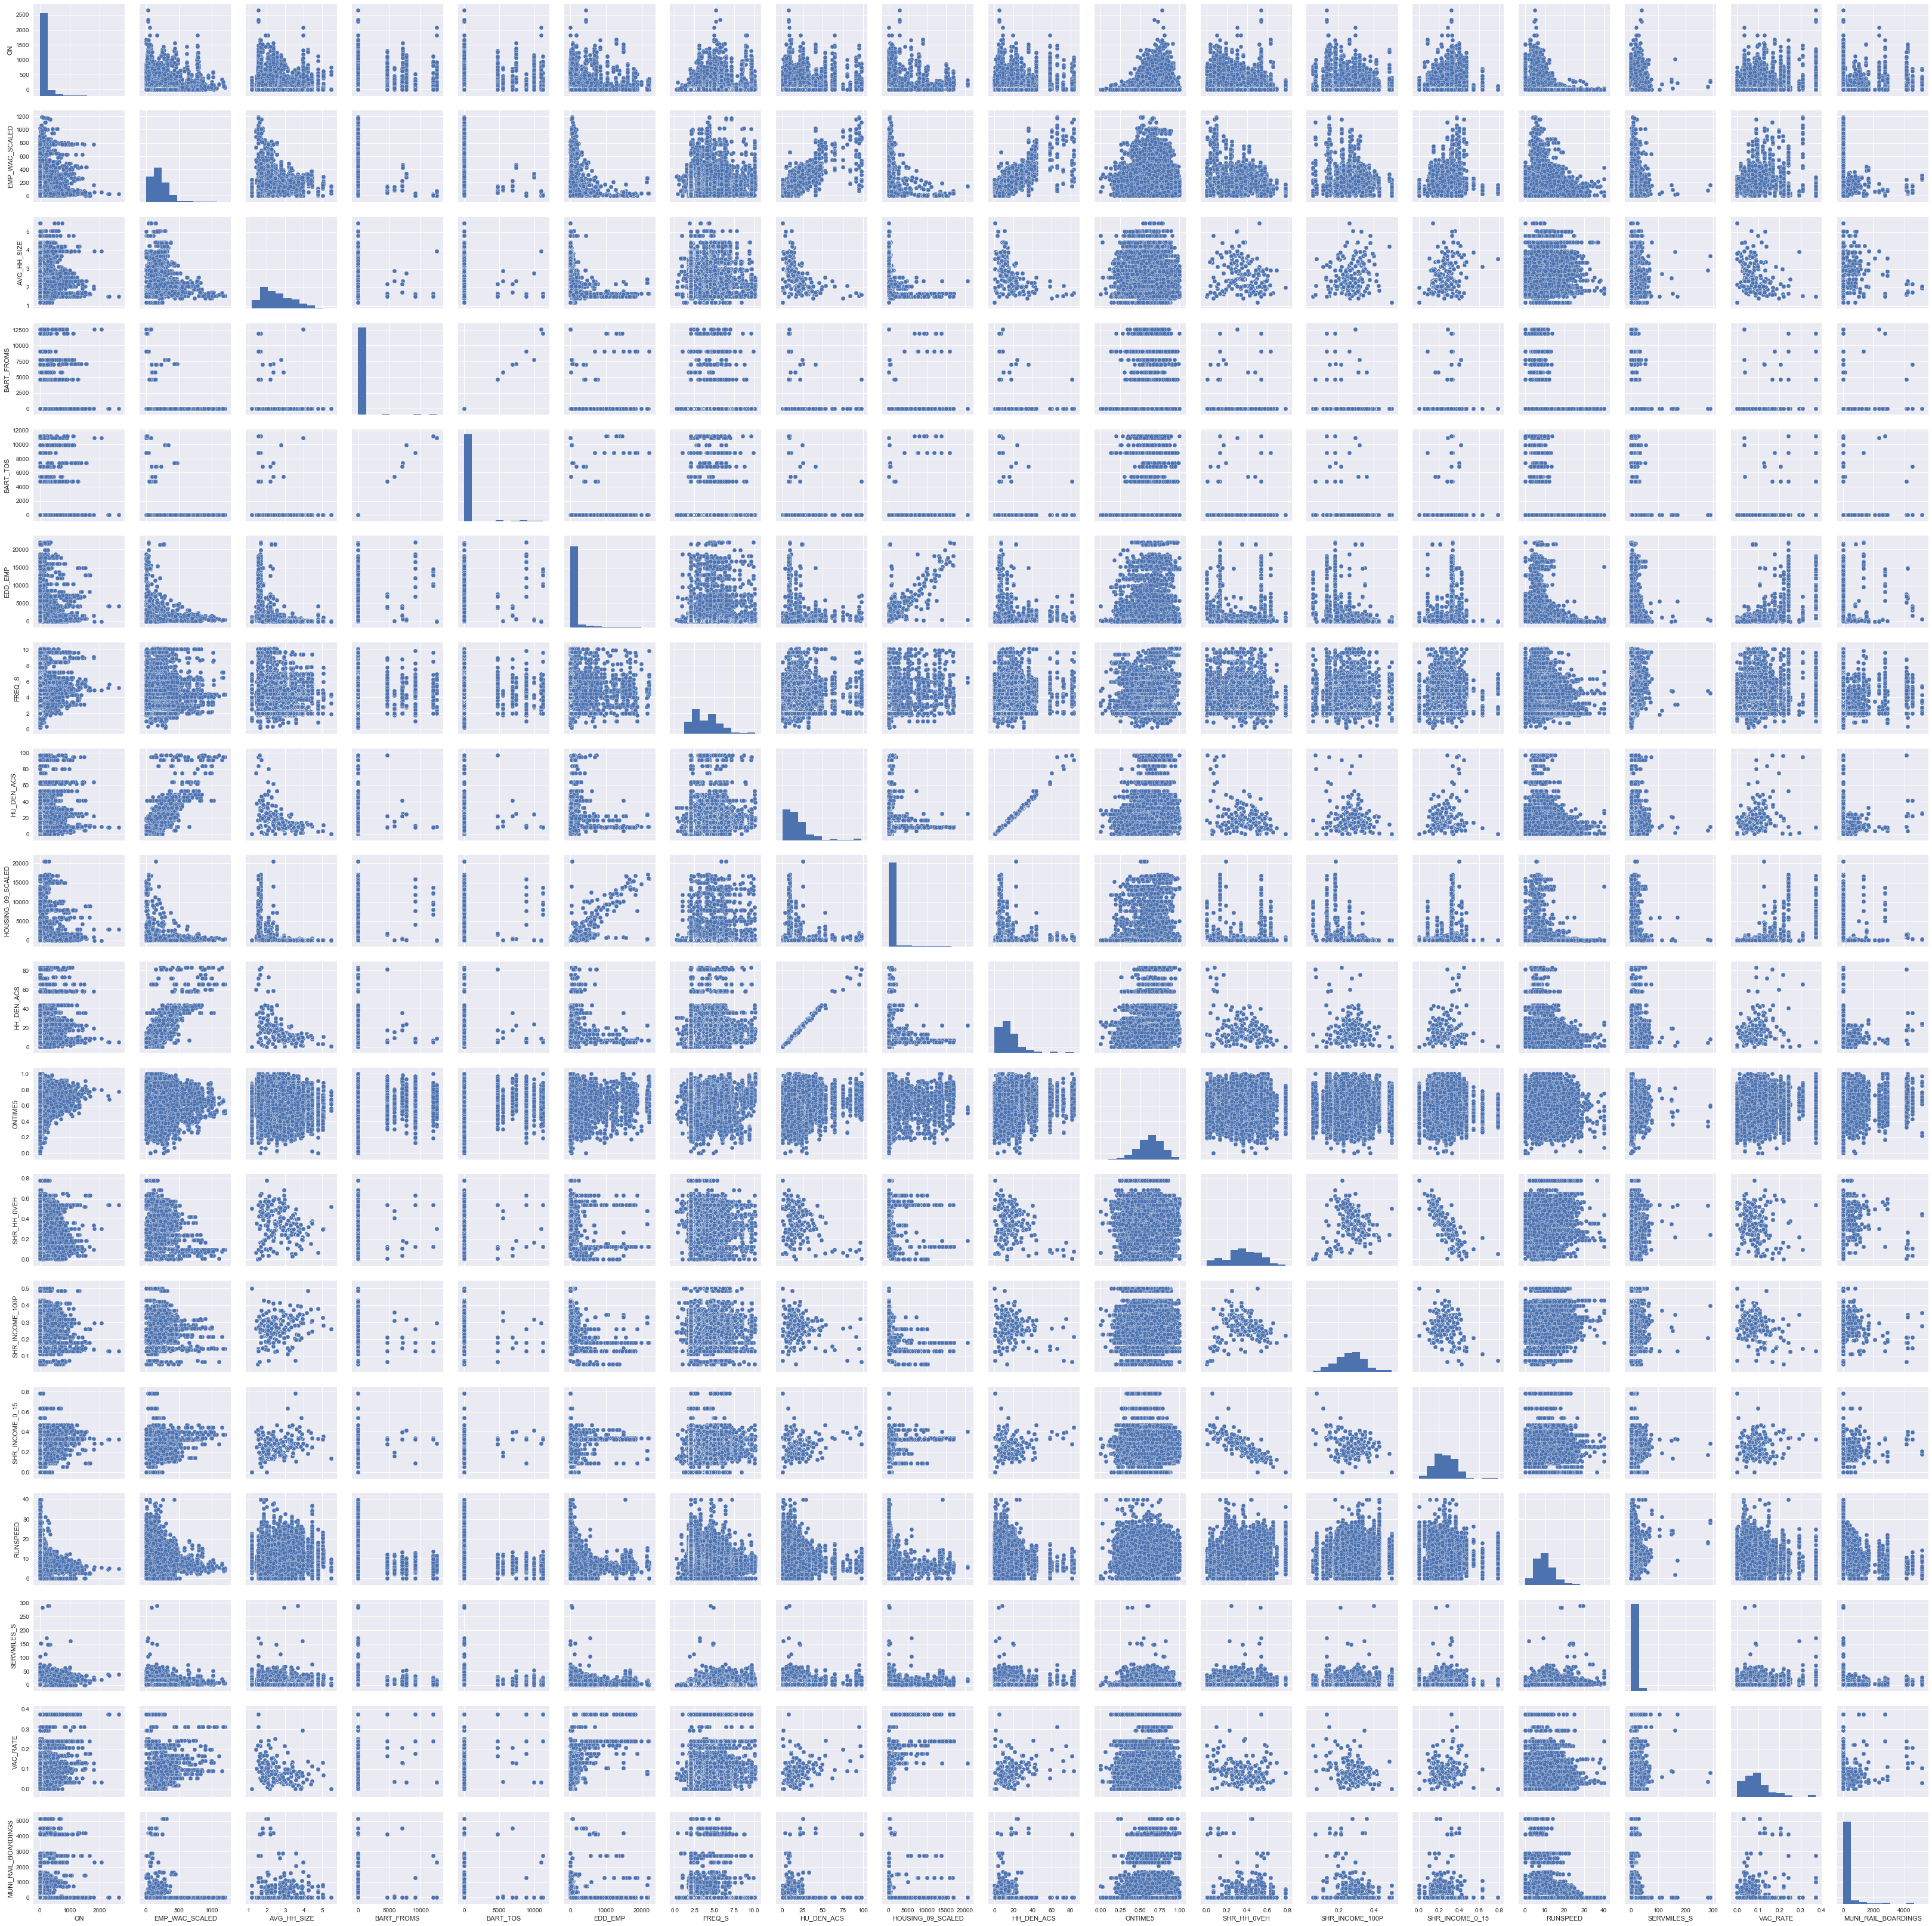

In [156]:
# look at pair plots
pairing_estimate = pd.DataFrame()
convert = ['ON','EMP_WAC_SCALED','AVG_HH_SIZE','HOURLY_AVG_ON_PARK','BART_FROMS','BART_TOS','EDD_EMP','FARE','FREQ_S','HU_DEN_ACS','HOUSING_09_SCALED','HH_DEN_ACS','ONTIME5','SHR_HH_0VEH','SHR_INCOME_100P','SHR_INCOME_0_15','RUNSPEED','SERVMILES_S','VAC_RATE','MUNI_RAIL_BOARDINGS']
pairing_estimate = estimate[convert].dropna()
print(len(pairing_estimate))
fig = sns.pairplot(pairing_estimate[['ON','EMP_WAC_SCALED','AVG_HH_SIZE','BART_FROMS','BART_TOS','EDD_EMP','FREQ_S','HU_DEN_ACS','HOUSING_09_SCALED','HH_DEN_ACS','ONTIME5','SHR_HH_0VEH','SHR_INCOME_100P','SHR_INCOME_0_15','RUNSPEED','SERVMILES_S','VAC_RATE','MUNI_RAIL_BOARDINGS']])
fig.savefig('pair_plot.jpg')

In [157]:
for column in estimate.columns:
    print(column)

AGENCY_ID
ARRIVAL_TIME_DEV
AVG_HH_SIZE
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HU_DEN_ACS
IMP_TRIP_STOPS
LOAD_ARR
LOAD_DEP
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
ROUTE_LONG_NAME
ROUTE_SHORT_NAME
ROUTE_TYPE
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SEQ
SERVMILES
SERVMILES_S
SOL
STOPNAME
STOPNAME_AVL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_HEADSIGN
TRIP_STOPS
Total_Housing_Units
Total_Pop
VAC_RATE
VC
WAITHOURS
WGT_TRIP_STOPS
WHEELCHAIR
HOURLY_AVG_ON_PARK
TRANSBAY
HOUSING_09_SCALED
LEISER_RAC_SCALED
LEISER_WAC_SCALED
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
12_HR_OFF_PUB_PARK
1

In [158]:
# RUN 21
# back to preferred model, but with missing data dropped
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     1007.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:03   Log-Likelihood:            -1.0860e+05
No. Observations:               16940   AIC:                         2.172e+05
Df Residuals:                   16930   BIC:                         2.173e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0099      0.011     -0.

In [159]:
# RUN 22
# test 0 vehicle households
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     953.8
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:03   Log-Likelihood:            -1.0847e+05
No. Observations:               16940   AIC:                         2.170e+05
Df Residuals:                   16929   BIC:                         2.170e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0023      0.011     -0.

In [160]:
# RUN 23
# test average household size
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + AVG_HH_SIZE \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     875.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:03   Log-Likelihood:            -1.0846e+05
No. Observations:               16940   AIC:                         2.170e+05
Df Residuals:                   16928   BIC:                         2.170e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0084      0.011     -0.

In [161]:
# RUN 23
# test pop den instead of hh den
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + POP_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     957.7
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:03   Log-Likelihood:            -1.0845e+05
No. Observations:               16940   AIC:                         2.169e+05
Df Residuals:                   16929   BIC:                         2.170e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED    -0.0255      0.011     -2.

In [162]:
# RUN 25
# test housing units for consistency with change data
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HU_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     953.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:03   Log-Likelihood:            -1.0847e+05
No. Observations:               16940   AIC:                         2.170e+05
Df Residuals:                   16929   BIC:                         2.170e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0036      0.010      0.

In [163]:
# RUN 26
# test housing units for consistency with change data -- at census block level
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     956.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:03   Log-Likelihood:            -1.0846e+05
No. Observations:               16940   AIC:                         2.169e+05
Df Residuals:                   16929   BIC:                         2.170e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0185      0.00

In [164]:
for column in estimate.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
AGENCY_ID
ARRIVAL_TIME_DEV
AVG_HH_SIZE
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DAY_DISCOUNT_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOURLY_AVG_ON_PARK
HOUSING_09_SCALED
HU_DEN_ACS
IMP_TRIP_STOPS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
ROUTE_LONG_NAME
ROUTE_SHORT_NAME
ROUTE_TYPE
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SEQ
SERVMILES
SERVMILES_S
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
SOL
STOPNAME
STOPNAME_AVL
STOP_ID
TIMEPOINT


In [165]:
# RUN 27
# add income groups
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     876.3
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:04   Log-Likelihood:            -1.0846e+05
No. Observations:               16940   AIC:                         2.169e+05
Df Residuals:                   16928   BIC:                         2.170e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0188      0.00

In [166]:
# RUN 27
# add income groups
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       + SHR_INCOME_15_50 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     126.7
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          2.09e-268
Time:                        10:17:04   Log-Likelihood:                -18422.
No. Observations:                2754   AIC:                         3.687e+04
Df Residuals:                    2741   BIC:                         3.695e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED       -0.0805      0.02

In [167]:
# RUN 27
# add income groups and drop competing stops because of a high p value (low t stat)
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     949.1
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:04   Log-Likelihood:            -1.0848e+05
No. Observations:               16940   AIC:                         2.170e+05
Df Residuals:                   16929   BIC:                         2.171e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0339      0.00

In [168]:
# RUN 30
# add income groups
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     870.2
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:17:04   Log-Likelihood:            -1.0848e+05
No. Observations:               16940   AIC:                         2.170e+05
Df Residuals:                   16928   BIC:                         2.171e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0317      0.00

In [169]:
for column in estimate.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
AGENCY_ID
ARRIVAL_TIME_DEV
AVG_HH_SIZE
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DAY_DISCOUNT_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOURLY_AVG_ON_PARK
HOUSING_09_SCALED
HU_DEN_ACS
IMP_TRIP_STOPS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MONTH
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
ROUTE_LONG_NAME
ROUTE_SHORT_NAME
ROUTE_TYPE
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SEQ
SERVMILES
SERVMILES_S
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
SOL
STOPNAME
STOPNAME_AVL
STOP_ID
TIMEPOINT


In [170]:
# RUN
# these are the basic variables we want, so let's start from here...
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + MUNI_RAIL_BOARDINGS \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

PatsyError: Error evaluating factor: NameError: name 'PARKING_RATE_OFF_RESIDENTIAL' is not defined
    ON                        ~ EMP_WAC_SCALED                        + HOUSING_09_SCALED                        + ONTIME5                        + FREQ_S                        + EOL                       + SOL                        + RUNSPEED                        + NUM_BUS_STOPS                        + TRANSBAY                        + BART_FROMS                        + SHR_HH_0VEH                        + SHR_INCOME_100P                        + MUNI_RAIL_BOARDINGS                        + CALTRAIN_ON                        + PARKING_RATE_OFF_RESIDENTIAL                        -1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# try average of ONS and OFFS
estimate['AVG_RIDE'] = (estimate['ON'] + estimate['OFF'])/2

In [ ]:
estimate.head()

In [ ]:
# RUN
# test average riders

mod = smf.formula.ols(formula="AVG_RIDE \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + MUNI_RAIL_BOARDINGS \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
# test log of average riders
estimate['LOG_RIDERS'] = np.log(estimate.AVG_RIDE + 1)

In [ ]:
# RUN
# test log average riders

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + MUNI_RAIL_BOARDINGS \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
# RUN
# test log average riders

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
# RUN
# test log average riders

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
# RUN
# try low income but the p value is worst

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
# RUN
# go back to before but without parking

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
# RUN
# try different employment categories
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + RETAIL_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + TRANSBAY \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
# RUN
# try different employment categories
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + RETAIL_WAC_SCALED \
                       + LEISER_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + TRANSBAY \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


In [ ]:
estimate.E

In [ ]:
#RUN
# try different employment categories
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ RETAIL_WAC_SCALED \
                       + LEISER_WAC_SCALED \
                       + EDHLTH_WAC_SCALED \
                       + OTHER_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + TRANSBAY \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


In [ ]:
estimate['NONRETAIL_DEN_WAC'] = estimate.EMP_WAC_SCALED - estimate.RETAIL_WAC_SCALED

In [ ]:
# RUN
# test retail vs non-retail density
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ RETAIL_WAC_SCALED \
                       + NONRETAIL_DEN_WAC \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + TRANSBAY \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
estimate.columns

In [ ]:
estimate['AVG_BART'] = (estimate['BART_FROMS']+estimate['BART_TOS'])/2

In [ ]:
for column in estimate.columns:
    print(column)

In [ ]:
# RUN
# test retail vs non-retail density
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ RETAIL_WAC_SCALED \
                       + NONRETAIL_DEN_WAC \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + AVG_BART \
                       + SHR_HH_0VEH \
                       + TRANSBAY \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

In [ ]:
for column in estimate.columns.sort_values():
    print(column)

In [ ]:
# RUN
# trying different income categories in the next few
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_15_50 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


In [ ]:
# RUN

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_50_100 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


In [ ]:
# RUN
# this seems to be the preferred model for now...
#the 100P is the easiest to explain but the 50k to 100k has the highest t statistic

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())
res.save('Model.jpg')